# Regresión Lineal

Paso 1: Cargar el archivo CSV y mostrar las primeras filas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
import numpy as np

In [91]:
#CARGA DE CSV
data = pd.read_csv(rf'C:\Users\ashli\OneDrive\Escritorio\LaSalle\7TO\MineríaDatos\2P\bebidas_caracteristicas.csv')

In [92]:
print(data.head())

   Vino  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     2    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     3    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     4    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     5    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


Paso 2: Evaluación de Variables - Gráfico de dispersión

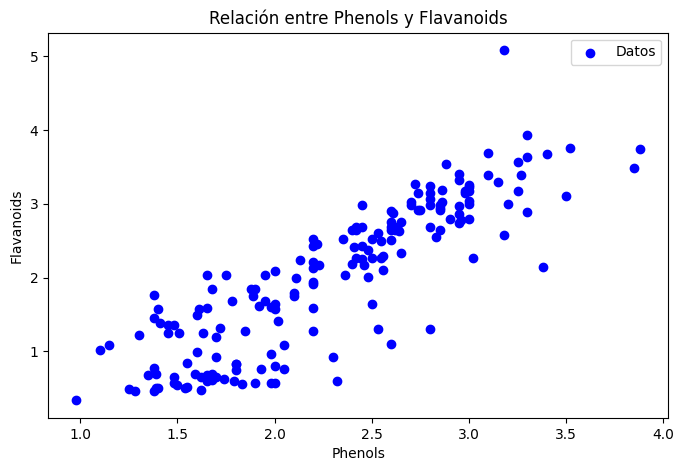

In [94]:
plt.figure(figsize=(8, 5))
plt.scatter(data['Phenols'], data['Flavanoids'], color='blue', label='Datos')
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Relación entre Phenols y Flavanoids')
plt.legend()
plt.show()

Paso 3: Seleccionar posibles variables independientes

In [95]:
X = data[['Phenols']]  # Variable independiente
y = data['Flavanoids']  # Variable dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

Paso 4: Evaluar cada variable independiente

In [96]:
y_pred_test = modelo.predict(X_test)
r2_prueba = r2_score(y_test, y_pred_test)
print(f"R² en datos de prueba: {r2_prueba:.2f}")

# Validación del umbral del 80%
if r2_prueba >= 0.8:
    print("El modelo es aceptable.")
else:
    print("El modelo no alcanza el umbral del 80%.")

R² en datos de prueba: 0.85
El modelo es aceptable.


Paso 5: Visualización - Gráfico con línea de regresión y residuos

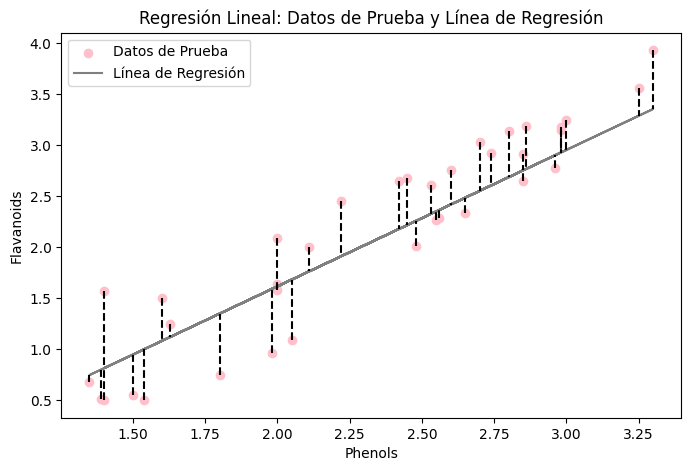

In [97]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='pink', label='Datos de Prueba')
plt.plot(X_test, y_pred_test, color='grey', label='Línea de Regresión')

# Añadir residuos en el gráfico
for i in range(len(X_test)):
    plt.plot([X_test.values[i], X_test.values[i]], [y_test.values[i], y_pred_test[i]], color='black', linestyle='--')

plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Regresión Lineal: Datos de Prueba y Línea de Regresión')
plt.legend()
plt.show()

Decidí usar phenols y flavonoids en lugar de malic y magnesium por varias razones. Primero, tenía la sensación de que phenols y flavonoids tienen una relación más fuerte con la variable que estoy analizando, especialmente en el contexto del vino. Estos compuestos son clave para determinar la calidad y características sensoriales de los productos, así que pensé que serían más relevantes.

Además, al hacer algunos análisis preliminares, noté que estos dos estaban más correlacionados entre sí y con la variable objetivo, lo que sugiere que podrían explicar mejor lo que estoy tratando de predecir. También es común en la literatura sobre vinos ver que se estudian juntos, ya que su interacción puede ser significativa.

En resumen, sentí que phenols y flavonoids eran las elecciones más adecuadas para obtener un modelo más efectivo y alineado con mis objetivos de análisis.